In [ ]:
from google.colab import files
uploaded = files.upload()

Saving customer_segmentation.csv to customer_segmentation.csv


In [ ]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['customer_segmentation.csv']), encoding = 'latin1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

<Axes: >

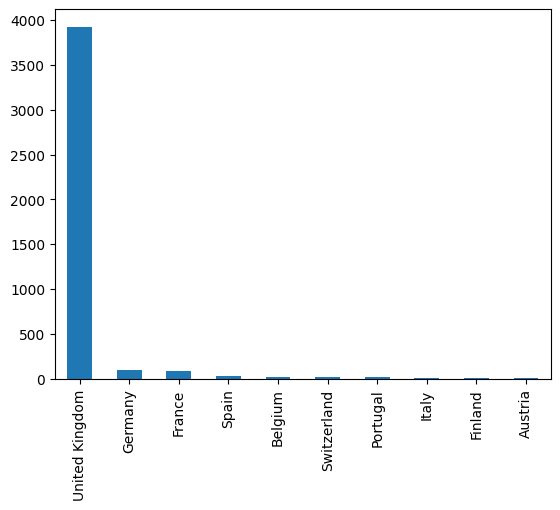

In [ ]:
df = df[~df['InvoiceNo'].str.startswith('C')]
from itertools import count
top10 = df[['Country', 'CustomerID']].drop_duplicates()
top10.Country.value_counts()[:10].plot(kind = 'bar')

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
df['TotalPurchaseAmount'] = df['Quantity'] * df['UnitPrice']

df['PurchaseDate'] = df['InvoiceDate'].dt.date
purchase_freq = num_transactions/total_customers

In [60]:
first_purchase = df.groupby('CustomerID')['PurchaseDate'].min()
first_purchase = pd.to_datetime(first_purchase)
#print(first_purchase)

last_purchase = df.groupby('CustomerID')['PurchaseDate'].max()
last_purchase = pd.to_datetime(last_purchase)
#print(last_purchase)

customer_lifespan = (last_purchase - first_purchase).dt.days

total_purchase = df.shape[0]
total_customers = len(customer_lifespan)
avg_freq = total_purchase/total_customers
#avg_order_value = df['TotalPurchaseAmount'].mean()
num_transactions = df.groupby('InvoiceNo').size()
df['NumberOfTransactions'] = df['InvoiceNo'].map(num_transactions)

df['AOV'] = df['TotalPurchaseAmount']/df['NumberOfTransactions']
#print(avg_freq)
df['AverageFrequency'] = avg_freq
avg_lifespan = customer_lifespan.mean()
#print(avg_lifespan)

churn_period = 90
current_date = pd.Timestamp(df['InvoiceDate'].max())
churned_customers = (current_date - last_purchase).dt.days > churn_period
total_customers = df['CustomerID'].nunique()
churned_count = churned_customers.sum()
churn_rate = churned_count/total_customers
print(churn_rate*100)

df['CLV'] = ((df['AOV']*purchase_freq)/churn_rate)*.10
df.drop(columns = ['Description'], inplace = True)
df

33.39479142659599


,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPurchaseAmount,PurchaseDate,AOV,CLV,NumberOfTransactions,AverageFrequency
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2.185714,80.342121,7,122.752017
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2.905714,106.807760,7,122.752017
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,3.142857,115.524618,7,122.752017
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2.905714,106.807760,7,122.752017
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2.905714,106.807760,7,122.752017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12-09,0.680000,24.995326,15,122.752017
541905,581587,22899,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12-09,0.840000,30.876580,15,122.752017
541906,581587,23254,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09,1.106667,40.678669,15,122.752017
541907,581587,23255,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09,1.106667,40.678669,15,122.752017


In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df[['AOV','AverageFrequency']]  # Assuming 'avg_freq' is the average purchase frequency per customer
y = df['CLV']  # Assuming 'CLV' is the target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict CLV on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 2.461478365966389e-24


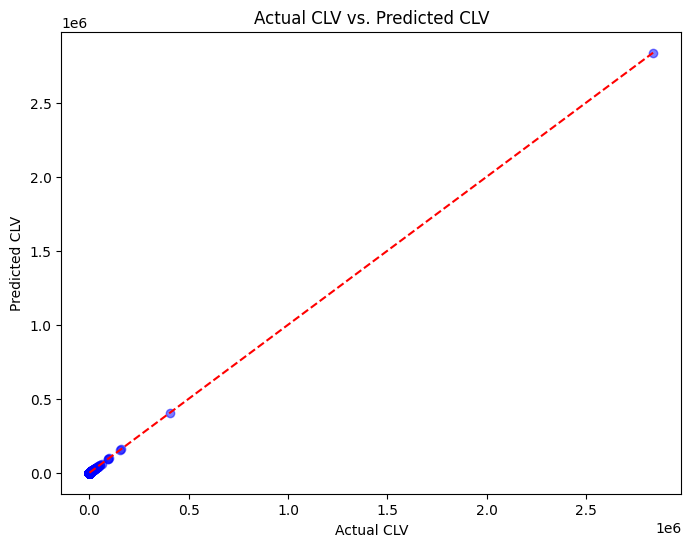

In [61]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.title('Actual CLV vs. Predicted CLV')
plt.xlabel('Actual CLV')
plt.ylabel('Predicted CLV')
plt.show()

In [55]:
predicted_clv = lr_model.predict(X_test)
clv_comparison_df = pd.DataFrame({'Actual CLV': y_test, 'Predicted CLV': predicted_clv})
print(clv_comparison_df)

         Actual CLV  Predicted CLV
17474      1.592839       1.592839
384259  1375.661900    1375.661900
400962     8.354053       8.354053
520625     4.075325       4.075325
173372    20.913939      20.913939
...             ...            ...
85404      3.281949       3.281949
90877      3.308205       3.308205
296169    27.808100      27.808100
210795     4.759172       4.759172
397433     1.668890       1.668890

[106525 rows x 2 columns]


In [62]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

accuracy_percentage = r2 * 100
print("Accuracy (R2 score) in percentage:", accuracy_percentage)

Accuracy (R2 score) in percentage: 100.0
